In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from imports_for_ML import load_images

In [43]:
import os

# remember to change the img_dir address!

img_dir = r'C:\Users\dsuifh\anaconda3\envs\classproject\DogVsCat\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [44]:
cat_or_dog = 'dog'
image_index = 1122
img_file = '{}.{}.{}'.format(cat_or_dog, str(image_index), 'jpg')

In [45]:
img = load_img(os.path.join(img_dir, img_file))
img_arr = img_to_array(img)

In [46]:
full_images = [os.path.join(img_dir, img) for img in images]
image_index = 12639
img = load_img(full_images[image_index], target_size=(50, 50))

In [47]:
image_index = 12856
test_image = img_to_array(load_img(full_images[image_index]))

# Let's average the RGB dimension
test_image_gr = test_image.mean(axis=2)

In [48]:
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])


In [49]:
convolved_image1 = convolve2d(test_image_gr, kernel1)
convolved_image2 = convolve2d(test_image_gr, kernel2)
convolved_image3 = convolve2d(test_image_gr, kernel3)

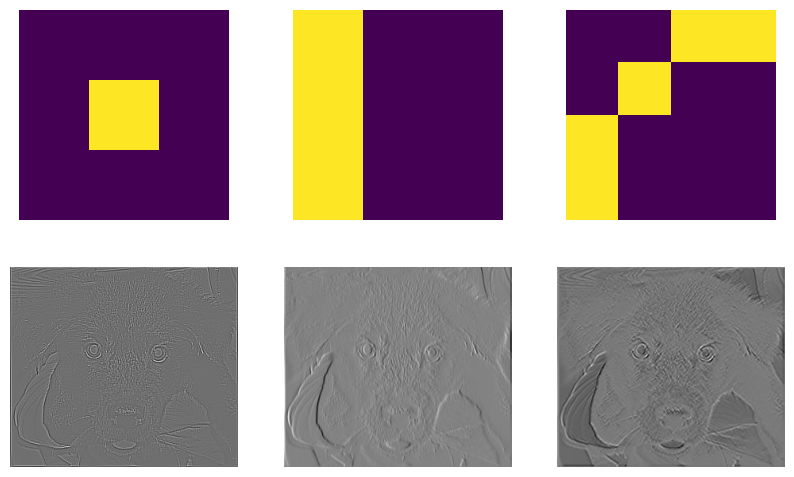

In [50]:
# we create a list of all filters and effects on one chart
# the first we create the chart itself, consisting of several panels
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# We complete the first line
ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)

# We complete the second line
ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

# We disable axle markings for all panels
for a in ax.ravel():
    a.axis('off')

In [51]:
X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Conv2D(16,(3,3), activation = 'relu' ), #16 filters/neurons, 3 by 3
    Conv2D(16,(3,3), activation = 'relu' ),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation = 'relu' ),
    Conv2D(32,(3,3), activation = 'relu' ),
    MaxPooling2D((2,2)), 
    Flatten( input_shape = (5, 5,32)),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
#make epochs 100

Epoch 1/30
250/250 [==============================] - 5s 19ms/step - loss: 1.0768 - accuracy: 0.5400 - val_loss: 0.6761 - val_accuracy: 0.5305
Epoch 2/30
250/250 [==============================] - 4s 17ms/step - loss: 0.6718 - accuracy: 0.5738 - val_loss: 0.6597 - val_accuracy: 0.5855
Epoch 3/30
250/250 [==============================] - 5s 19ms/step - loss: 0.6673 - accuracy: 0.5839 - val_loss: 0.6768 - val_accuracy: 0.5775
Epoch 4/30
250/250 [==============================] - 4s 17ms/step - loss: 0.6501 - accuracy: 0.6119 - val_loss: 0.6526 - val_accuracy: 0.6065
Epoch 5/30
250/250 [==============================] - 4s 16ms/step - loss: 0.6431 - accuracy: 0.6255 - val_loss: 0.6302 - val_accuracy: 0.6350
Epoch 6/30
250/250 [==============================] - 4s 18ms/step - loss: 0.6161 - accuracy: 0.6507 - val_loss: 0.6329 - val_accuracy: 0.6415
Epoch 7/30
250/250 [==============================] - 5s 18ms/step - loss: 0.5993 - accuracy: 0.6762 - val_loss: 0.5950 - val_accuracy: 0.6685

Accuracy on the training data:
250/250 [==============================] - 1s 5ms/step - loss: 0.2245 - accuracy: 0.9075
0.9075000286102295

Accuracy on the test data:
63/63 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.8705
0.8705000281333923


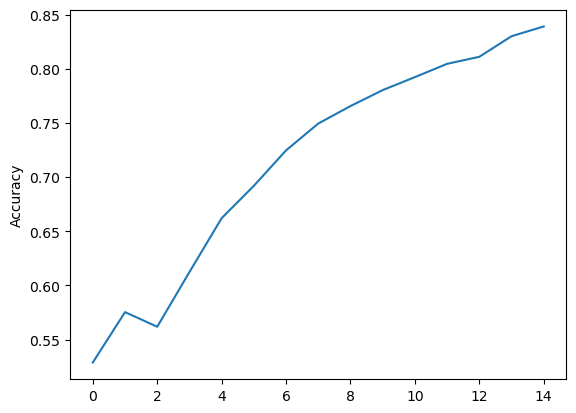

In [13]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

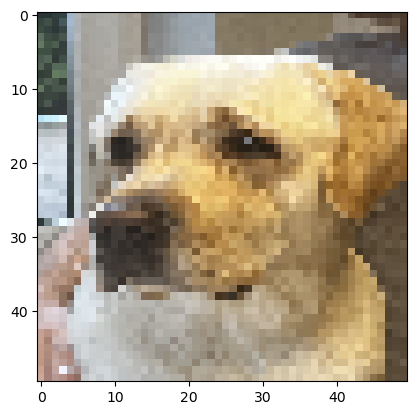

In [54]:
img = load_img('C:/Users/dsuifh/Downloads/IMG_3059.jpg',target_size=(50, 50))
plt.imshow(img)

In [55]:
img_array = img_to_array(img)
model.predict(img_array.reshape((1, 50, 50, 3))) #above 0.5 - dogs, below are cats
#so our model is correct

1/1 [==============================] - 0s 69ms/step


array([[0.79410106]], dtype=float32)

In [58]:
import keras
keras.models.save_model(model=model, filepath=r'C:\Users\dsuifh\anaconda3\envs\classproject\DogVsCat\my_model_1', 
                           save_format='h5')